In [79]:
import numpy as np
import networkx as nx
from collections import Counter
from itertools import combinations
from kervis.dataset import Dataset
from matplotlib import pyplot as plt
from kervis.utils import fetch_dataset
from grakel.kernels import GraphletSampling

In [80]:
G1 = nx.Graph()
G1.add_node(0, label=0)
G1.add_node(1, label=0)
G1.add_node(2, label=0)
G1.add_node(3, label=0)
G1.add_node(4, label=1)
G1.add_node(5, label=1)
G1.add_node(6, label=1)
G1.add_edges_from([
     (0,3),
     (1,3),
     (2,3),
     (3,4),
     (4,5),
     (4,6)])

G2 = nx.Graph()
G2.add_node(7, label=0)
G2.add_node(8, label=0)
G2.add_node(9, label=0)
G2.add_node(10, label=0)
G2.add_node(11, label=1)
G2.add_node(12, label=1)
G2.add_node(13, label=1)
G2.add_edges_from([
     (7,10),
     (8,10),
     (9,10),
     (10,11),
     (11,12),
     (11,13),
     (7,12),
     (9,13)])

In [81]:
k = 4

MUTAG = fetch_dataset("MUTAG", verbose=False)
GS = GraphletSampling(k)
GS.fit_transform(MUTAG.data)
GS._phi_X

array([[ 48.,  24.,   0.,   0.],
       [ 26.,  16.,   0.,   0.],
       [ 32.,  17.,   0.,   0.],
       [ 68.,  37.,   1.,   0.],
       [ 18.,  11.,   0.,   0.],
       [ 84.,  45.,   0.,   0.],
       [ 35.,  19.,   0.,   0.],
       [ 52.,  28.,   2.,   0.],
       [ 23.,  10.,   2.,   0.],
       [ 43.,  25.,   2.,   0.],
       [ 52.,  27.,   0.,   0.],
       [ 63.,  30.,   0.,   0.],
       [ 75.,  43.,   2.,   0.],
       [ 26.,  19.,   2.,   0.],
       [ 71.,  37.,   0.,   0.],
       [ 78.,  45.,   2.,   0.],
       [ 21.,  15.,   0.,   0.],
       [ 45.,  28.,   2.,   0.],
       [ 24.,  13.,   0.,   0.],
       [ 49.,  26.,   2.,   0.],
       [ 38.,  21.,   0.,   0.],
       [ 45.,  24.,   2.,   0.],
       [ 86.,  47.,   2.,   0.],
       [136.,  69.,   0.,   0.],
       [ 45.,  24.,   2.,   0.],
       [ 21.,  16.,   0.,   0.],
       [ 90.,  45.,   0.,   0.],
       [ 45.,  24.,   2.,   0.],
       [ 69.,  45.,   2.,   0.],
       [ 87.,  45.,   2.,   0.],
       [ 8

In [82]:
GS._graph_bins

{0: <grakel.kernels._isomorphism.bliss.Graph at 0x15d8fd670>,
 1: <grakel.kernels._isomorphism.bliss.Graph at 0x15d916580>,
 2: <grakel.kernels._isomorphism.bliss.Graph at 0x15d8e2e50>,
 3: <grakel.kernels._isomorphism.bliss.Graph at 0x15d551220>}

6


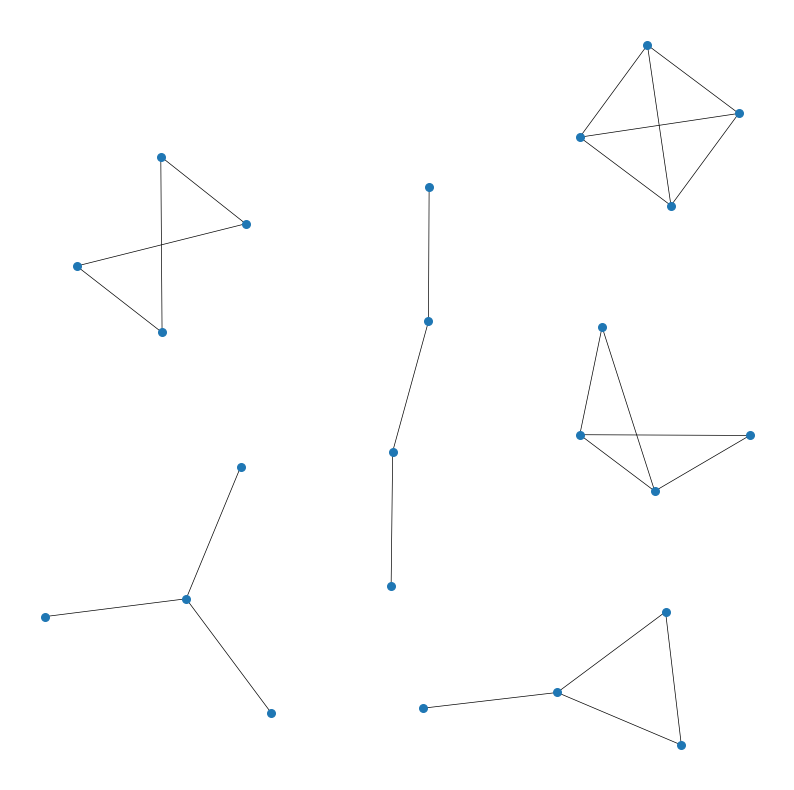

In [83]:
graphlets = [g for g in nx.graph_atlas_g() if len(g.nodes())==k and len(list(nx.connected_components(g)))==1] # and len(list(nx.connected_components(g)))==1
print(len(graphlets))

graphlets_G = nx.Graph()
for index, graphlet in enumerate(graphlets):  
    graphlets_G.add_nodes_from(np.array(graphlet.nodes())+index*k)
    graphlets_G.add_edges_from(np.array(graphlet.edges())+index*k)

plt.figure(figsize=(10, 10), dpi=100)
plt.margins(0.0)
pos = nx.nx_agraph.pygraphviz_layout(graphlets_G)
nx.draw(graphlets_G, pos=pos, node_color="tab:blue", width=0.5, node_size=30)

In [90]:
dataset = Dataset("MUTAG")

features = []
graph = dataset.graphs[0]

for graph in dataset.graphs:
    feature = []
    C = combinations(list(graph), k)
    for c in C:
        for i in range(len(graphlets)):
            if nx.is_isomorphic(graph.subgraph(c), graphlets[i]):
                feature.append((c, i))

    features.append(feature)

print(features)

[[((1, 2, 3, 4), 1), ((1, 2, 3, 6), 1), ((1, 2, 5, 6), 1), ((1, 4, 5, 6), 1), ((1, 5, 6, 7), 1), ((2, 3, 4, 5), 1), ((2, 3, 4, 10), 1), ((3, 4, 5, 6), 1), ((3, 4, 5, 7), 1), ((3, 4, 5, 10), 0), ((3, 4, 9, 10), 1), ((3, 4, 10, 11), 1), ((4, 5, 6, 7), 0), ((4, 5, 6, 10), 1), ((4, 5, 7, 8), 1), ((4, 5, 7, 10), 1), ((4, 5, 9, 10), 1), ((4, 5, 10, 11), 1), ((4, 8, 9, 10), 1), ((4, 9, 10, 11), 0), ((4, 9, 10, 14), 1), ((4, 10, 11, 12), 1), ((5, 6, 7, 8), 1), ((5, 7, 8, 9), 1), ((7, 8, 9, 10), 1), ((7, 8, 9, 14), 1), ((8, 9, 10, 11), 1), ((8, 9, 10, 14), 0), ((8, 9, 13, 14), 1), ((9, 10, 11, 12), 1), ((9, 10, 11, 14), 1), ((9, 10, 13, 14), 1), ((9, 12, 13, 14), 1), ((9, 13, 14, 15), 1), ((10, 11, 12, 13), 1), ((11, 12, 13, 14), 1), ((11, 12, 13, 15), 1), ((12, 13, 14, 15), 0), ((12, 13, 15, 16), 1), ((12, 13, 15, 17), 1), ((13, 14, 15, 16), 1), ((13, 14, 15, 17), 1), ((13, 15, 16, 17), 0)], [((18, 19, 20, 21), 1), ((18, 19, 20, 25), 1), ((18, 19, 20, 27), 1), ((18, 19, 26, 27), 1), ((18, 25, 

In [100]:
import concurrent.futures

def get_feature(graph):
    feature = []
    C = combinations(list(graph), k)
    for c in C:
        for i in range(len(graphlets)):
            if nx.is_isomorphic(graph.subgraph(c), graphlets[i]):
                feature.append((c, i))

    return feature

with concurrent.futures.ThreadPoolExecutor(max_workers=20) as executor:
    futures = {executor.submit(get_feature, graph) for graph in dataset.graphs}
    results = []
    for future in concurrent.futures.as_completed(futures):
        results.append(future.result())

print(results)

[[((280, 281, 282, 283), 1), ((280, 281, 282, 285), 1), ((280, 281, 282, 290), 1), ((280, 281, 284, 285), 1), ((280, 283, 284, 285), 1), ((280, 284, 285, 286), 1), ((281, 282, 283, 284), 1), ((281, 282, 283, 287), 1), ((281, 282, 283, 290), 0), ((282, 283, 284, 285), 1), ((282, 283, 284, 286), 1), ((282, 283, 284, 287), 0), ((282, 283, 284, 290), 1), ((282, 283, 287, 288), 1), ((282, 283, 287, 289), 1), ((282, 283, 287, 290), 1), ((283, 284, 285, 286), 0), ((283, 284, 285, 287), 1), ((283, 284, 286, 287), 1), ((283, 284, 287, 288), 1), ((283, 284, 287, 289), 1), ((283, 287, 288, 289), 0)], [((63, 64, 65, 66), 1), ((63, 64, 65, 68), 1), ((63, 64, 65, 73), 1), ((63, 64, 67, 68), 1), ((63, 64, 68, 69), 1), ((63, 66, 67, 68), 1), ((63, 67, 68, 69), 0), ((64, 65, 66, 67), 1), ((64, 65, 66, 70), 1), ((64, 65, 66, 73), 0), ((65, 66, 67, 68), 1), ((65, 66, 67, 70), 0), ((65, 66, 67, 73), 1), ((65, 66, 70, 71), 1), ((65, 66, 70, 72), 1), ((65, 66, 70, 73), 1), ((66, 67, 68, 69), 1), ((66, 67, 6

In [101]:
import multiprocessing

pool = multiprocessing.Pool()

results = pool.map(get_feature, dataset.graphs)

# Output the results
for result in results:
    print(result)

Process SpawnPoolWorker-74:
Process SpawnPoolWorker-79:
Process SpawnPoolWorker-78:
Process SpawnPoolWorker-77:
Process SpawnPoolWorker-73:
Process SpawnPoolWorker-76:
Process SpawnPoolWorker-75:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/congrendai/miniconda3/envs/grakel/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/Users/congrendai/miniconda3/envs/grakel/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/congrendai/miniconda3/envs/grakel/lib/python3.8/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/congrendai/miniconda3/envs/grakel/lib/python3.8/multiprocessing/queues.py", line 358, in get
    return _ForkingPickler.loads(res)
  File "/Users/congrendai/miniconda3/envs/grakel/lib/python3.8/multiprocessing/process.py", line 315, in _

KeyboardInterrupt: 

In [102]:
import concurrent.futures

def task(n):
    return n ** 2

# Use a dictionary to keep track of futures and their corresponding order
futures = {}
with concurrent.futures.ProcessPoolExecutor() as executor:
    for i, n in enumerate(range(10)):
        future = executor.submit(task, n)
        futures[future] = i

# Then sort the results based on this order
results = []
for future in concurrent.futures.as_completed(futures):
    order = futures[future]
    results.append((order, future.result()))

results.sort()  # Sort the results based on the order

# Extract the results only (we no longer need the order)
results = [result for _, result in results]

Process SpawnProcess-117:
Process SpawnProcess-113:
Process SpawnProcess-115:
Process SpawnProcess-116:
Process SpawnProcess-114:
Process SpawnProcess-118:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/congrendai/miniconda3/envs/grakel/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/congrendai/miniconda3/envs/grakel/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/congrendai/miniconda3/envs/grakel/lib/python3.8/concurrent/futures/process.py", line 233, in _process_worker
    call_item = call_queue.get(block=True)
  File "/Users/congrendai/miniconda3/envs/grakel/lib/python3.8/multiprocessing/queues.py", line 116, in get
    return _ForkingPickler.loads(res)
  File "/Users/congrendai/miniconda3/envs/grakel/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/congrendai/miniconda3/envs/gr

BrokenProcessPool: A process in the process pool was terminated abruptly while the future was running or pending.

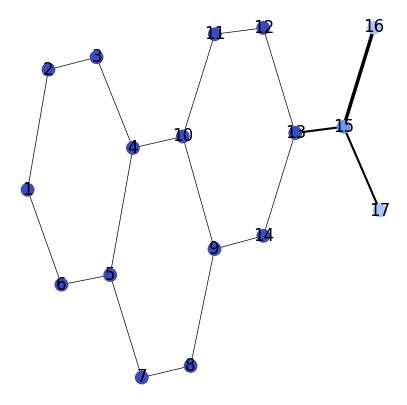

In [86]:
dataset.plot_graph(0, with_labels=True)